# Graph Search Algorithms

## Contents
1. [Graph Search](#graph-search)
2. [Graph Traversal Algorithms](#graph-traversal-algorithms)
    - [Breadth-first Search \(BFS\)](#breadth-first-search-bfs)
    - [Depth-first Search \(DFS\)](#depth-first-search-dfs)
3. [Shortest Path Algorithms](#shortest-path-algorithms)
    - [Dijkstra Search](#dijkstra-search)
    - [Hill Climbing](#hill-climbing)
    - [Beam Search](#beam-search)
    - [A* Search](#a-search)
    - [Bi-directional Search](#bi-directional-search)
4. [Heirarchical Approaches](#heirarchical-approaches)
5. [Summary](#summary)

---

## Graph Search

A graph is a mathematical way to represent road networks. Graphs consist of 3 sets: 

- vertices/nodes
- edges
- a set representing relations between vertices and edges 

The nodes represent intersections, and the edges represent the roads themselves. A `route` is a sequence of edges connecting the `origin node` to the `destination node`. <br><br>

`Searching` is the systematic examination of states to find a path from the start state to the goal state. Mathematically speaking, a graph can be represented by $G$, where 

$G=(V,E)$
<br><br>

For a graph $G$, vertices are represented by $V$, and edges by $E$.
 
Each edge is a tuple $(v,w)$, where 

$w$, $v \in V$

Weight can be added as a third component to the edge tuple.<br><br>

Search algorithms can be broadly classified into `deterministic` algorithms and `stochastic` algorithms. 

In the former, the search algorithm follows a rigorous procedure and its path and values of both design variables and the functions are repeatable. For the same starting point, the algorithm will follow the same path whether you run the program today or tomorrow. 

In the latter, the algorithm always has some randomness and the solution is not exactly repeatable. Based on the availability of information about the search space (e.g. the distance from the current state to the goal), deterministic search algorithms can be broadly classified into `blink/uninformed` and `informed` search.

![Graph Search](../images/GraphSearch.png)

---

## Graph Traversal Algorithms

Graph traversal refers to a process that traverses vertices of a graph following a certain order (starting from user-input sources). This category of graph search algorithms only seeks to find a path between two nodes, without optimizing for the length of the final route. In applications where the weight of edges in a graph are all equal (e.g. 1), BFS and DFS algorithms outperform shortest path algorithms like Dijkstra's. 

### Breadth-first Search (BFS)

 BFS is an algorithm where the traversal starts at a specified node (the source or starting node) and continues along the graph layerwise, thus exploring all exploring all of the the current node's neighbouring nodes (those which are directly connected to the current node). If a result is not found, the algorithm proceeds to search the next-level neighbour nodes.

<style>
i {font-weight:normal}
span {font-weight:normal}
</style>

<div style="background-color: rgba(0,0,0,0.0470588);padding:10px;font-family:monospace;">
    <b>BREADTH-FIRST-SEARCH</b>(<i>source</i>,<i>destination</i>) <b>return</b> a <i>route</i>
    <div style='padding-left:20px;'>
        <i><font color="green">frontier</font></i> &larr; <span>a <b>FIFO</b> initialized with <i>source</i> node</span><br>
        <i><font color="grey">explored</font></i> &larr; <i>empty</i><br>
        <i><font color="blue">found</font></i> &larr; <i>False</i><br><br>
        while <i><font color="green">frontier</font></i> is not <i>empty</i> and <i><font color="blue">found</font></i> is <i>False</i>  do<br>
        <div style='padding-left:20px;'>
            <i>node</i> &larr; <i><font color="green">frontier</font></i>.pop()<br>
            add <i>node</i> to <i><font color="grey">explored</font></i><br>
            for <i>child</i> in <i>node</i>.expand() do
            <div style='padding-left:20px;'>
                if <i>child</i> is not in <i><font color="grey">explored</font></i> and <i>child</i> is not in <i><font color="green">frontier</font></i> then
                <div style='padding-left:20px;'>
                    if <i>child</i> is <i>destination</i> then
                    <div style='padding-left:20px;'>
                        <i>route</i> &larr; <i>child</i>.route()<br>
                        <i><font color="blue">found</font></i> &larr; <i>True</i>
                    </div>
                    add <i>child</i> to <i><font color="green">frontier</font></i>
                </div>
            </div>
        return <i>route</i>
        </div>
    </div>
</div>



Using BFS, search for the shortest path between The Equestrian Statue and the Bahen Centre. This example uses the same data as in [Getting Started](GettingStarted.ipynb).

:::{note}
This book uses the `smart_mobility_utilities` package for some operations, in order to simplify the process of visualizing graphs. You can find out more about downloading and installing the package [here](ToolsAndPythonLibraries.html#smart_mobility_utilities-python-package).
:::

Let's first find the largest connected component centered around our location, with a specified distance on each side. The reference point is the centre of the University of Toronto's downtown campus.

In [1]:
import osmnx
reference = (43.661667, -79.395)
G = osmnx.graph_from_point(reference, dist=500, clean_periphery=True, simplify=True)

To plot the network, we will also need to highlight the starting and ending nodes. For the sake of simplicity, we will use the node id directly. For more information on finding the closest node to a given coordinate, refer back to the Getting Started section's [example](GettingStarted.ipynb#shortest-path-analysis).

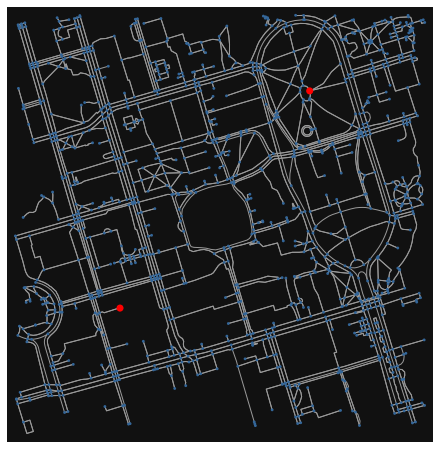

In [3]:
highlighted = [1907446268, 1633421938]

# marking both the source and destination node

nc = ['red' if node in highlighted else '#336699' for node in G.nodes()]
ns = [50 if node in highlighted else 8 for node in G.nodes()]
fig, ax = osmnx.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

Let's visualize the above graph on a `ipyleaflet` map, using a helper function from the `smart_mobility_utilities` package.

In [ ]:
from smart_mobility_utilities.viz import draw_map
draw_map(G,highlight=highlighted, force_leaflet=True)

:::{warning}
For the purposes of this map, we use the `force_leaflet` option so that the map will be rendered by `ipyleaflet`. Normally, when there are more than 1,000 nodes in a graph, `ipyleaflet` performance is very slow. The visualization tools in `smart_mobility_utilities` will automatically switch to `folium` when there are more than 1,000 nodes, unless the `force_leaflet` flag is used. See the docs for `smart_mobility_utilities` for more information.
:::

Currently, each node in the above graph is represented as a python `dict` with many attributes that are of no interest to us. This makes accessing certain properties of nodes overly complicated and verbose. To minimize this, we can use the `Node` class from `smart_mobility_utilities.common` to redefine the nodes, and only retain key information like parent, edge length from parent, and the node itself. You can view the structure of `Node` [here]().

In [2]:
from smart_mobility_utilities.common import Node, cost
from tqdm.notebook import tqdm
from collections import deque

# First convert the source and destination nodes to Node
origin = Node(graph=G, osmid=1907446268)
destination = Node(graph=G, osmid=1633421938)

# Setup a progress bar using tqdm, max is V+E
time_complexity = len(G.nodes)+len(G.edges)
bar = tqdm(total=time_complexity)

route = []
frontier = deque([origin])
explored = set()
found = False

while frontier and not found:
    node = frontier.popleft()
    explored.add(node)
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                route = child.path()
                found = True
            frontier.append(child)
        bar.update(1)

bar.close()
print("Route: \n",route,"\n\n Cost:\n",cost(G,route))


  0%|          | 0/4570 [00:00<?, ?it/s]

Route: 
 [1907446268, 55808224, 55808416, 55808284, 1721866234, 389678268, 4953810915, 389678267, 24960090, 24960068, 1258698109, 389678145, 24960070, 24960073, 24960076, 24960080, 6028561924, 5098988924, 389678131, 6028562356, 854322047, 389677908, 24959560, 242413453, 749951161, 7311057931, 389678216, 389678215, 389678226, 1633421933, 1633421938] 

 Cost:
 1385.116


:::{note}
We used `collections.deque` instead of a `list` because of the time-complexity required for `pop` and `append`.
With pythonic `list`, these two operations take `O(n)` time, while `collections.deque` operates in `O(1)` time, as it is based on `LinkedList`.

Additionally, `tqdm.notebook` was used because we are rendering the progress in a Jupyter Notebook. For normal use, you can import directly from `tqdm`.
:::

As you can see, the BFS algorithm managed to find the route from source to destination in under a second, having transversed 91% of the graph to find it. Let's plot the route.

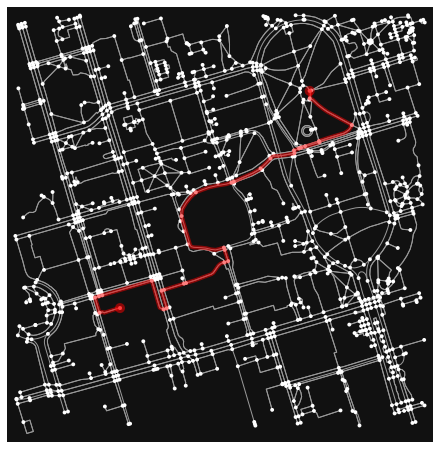

In [5]:
fig, ax = osmnx.plot_graph_route(G, route)

Let's also plot it on a map.

In [6]:
from smart_mobility_utilities.viz import draw_route
draw_route(G, route)

Map(center=[43.6611082, -79.3947681], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

--- 

### Depth-first Search (DFS)

The DFS algorithm is a recursive algorithm that uses the idea of **backtracking**. It involves exhaustive searches of all the nodes by going as deep as possible into the graph. When it reaches the last layer with no result, it "backtracks" up a layer and continues the search.


<style>
i {font-weight:normal}
span {font-weight:normal}
</style>

<div style="background-color: rgba(0,0,0,0.0470588);padding:10px;font-family:monospace;">
    <b>DEPTH-FIRST-SEARCH</b>(<i>source</i>,<i>destination</i>) <b>return</b> a <i>route</i>
    <div style='padding-left:20px;'>
        <i><font color="green">frontier</font></i> &larr; <span>a <b>LIFO</b> initialized with <i>source</i> node</span><br>
        <i><font color="grey">explored</font></i> &larr; <i>empty</i><br>
        <i><font color="blue">found</font></i> &larr; <i>False</i><br><br>
        while <i><font color="green">frontier</font></i> is not <i>empty</i> and <i><font color="blue">found</font></i> is <i>False</i>  do<br>
        <div style='padding-left:20px;'>
            <i>node</i> &larr; <i><font color="green">frontier</font></i>.pop()<br>
            add <i>node</i> to <i><font color="grey">explored</font></i><br>
            for <i>child</i> in <i>node</i>.expand() do
            <div style='padding-left:20px;'>
                if <i>child</i> is not in <i><font color="grey">explored</font></i> and <i>child</i> is not in <i><font color="green">frontier</font></i> then
                <div style='padding-left:20px;'>
                    if <i>child</i> is <i>destination</i> then
                    <div style='padding-left:20px;'>
                        <i>route</i> &larr; <i>child</i>.route()<br>
                        <i><font color="blue">found</font></i> &larr; <i>True</i>
                    </div>
                    add <i>child</i> to <i><font color="green">frontier</font></i>
                </div>
            </div>
        return <i>route</i>
        </div>
    </div>
</div>

As you may have the noticed, the only difference between DFS and BFS is in the way that `frontier` works. Rather than working down layer by layer (FIFO), DFS drills down to the bottom-most layer and moves its way back to the starting node (LIFO).

Let's implement this algorithm with our previous example.

In [7]:
time_complexity = len(G.nodes) + len(G.edges) # Maximum is V + E
bar = tqdm(total=time_complexity) 

route = []
frontier = deque([origin])
explored = set()
found = False

while frontier and not found:
    node = frontier.pop()
    explored.add(node)
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                route  = child.path()
                found = True
                continue
            frontier.append(child)
        bar.update(1)

bar.close()
print("Route: \n",route,"\n\n Cost:\n",cost(G,route))

  0%|          | 0/4570 [00:00<?, ?it/s]

Route: 
 [1907446268, 55808205, 55808194, 55808408, 55808414, 8711144452, 55808328, 55808437, 3210497979, 389677988, 1686556839, 389677984, 50885180, 36607322, 389677990, 389677993, 390545921, 60654129, 60654120, 50897854, 50897859, 389678001, 389678002, 2143434369, 390550470, 389678003, 390548860, 389678004, 771950946, 984911356, 728157228, 306721042, 389678005, 2143487625, 389678007, 5277943137, 2498969982, 389677902, 390545068, 390545043, 306725181, 390545044, 771931704, 775377001, 771950967, 8608123052, 771931728, 8608123055, 8608123068, 3554867351, 390545045, 390545047, 390545049, 390545050, 389678203, 390545078, 390545077, 24959544, 389678013, 389678205, 389678206, 389678207, 3996667046, 3996667045, 389678209, 389678210, 389678054, 389678175, 1432347915, 389678044, 389678043, 215726254, 3983181527, 389678211, 389678177, 24959555, 389678042, 389678184, 389678183, 389678216, 389678215, 389678214, 24959557, 389678218, 389678219, 773004741, 773004737, 5567060881, 5567060879, 10050078

In [8]:
draw_route(G,route)

Map(center=[43.6611082, -79.3947681], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

It is very evident that the paths generated by our DFS and BFS implementations are not the most direct route. This is because both DFS and BFS are algorithms that can find routes between two nodes, but make no guarantees that they will return the **shortest path**. Additionally, DFS generally returns "deeper" results as it traverses the entire depth of the graph and works backwards to find a solution.

---

## Shortest Path Algorithms
### Dijkstra Search

Dijkstra's algorithm allows us to find the shortest path between any two vertices of a graph. The algorithm creates a tree of shortest paths from the starting vertex, the source, to all other points in the graph.  Dijkstra's algorithm , published in 1959 and named after Dutch computer scientist Edsger Dijkstra, is the base of several other graph search algorithms commonly used to solve routing problems in popular navigation apps.

![](../images/Dijkstra.png)

<br>
The following pseudocode and `python` implementation for Dijkstra's algorithm has been modified to work with our OSM data. This is because graphs generated from maps will naturally have self-loops and parallel edges. 

Parallel edges may result in a route that is not the shortest available, as the route length depends heavily on which parallel edge was chosen when a particular path was generated. In the example below, the shortest path **may** be returned as 7, if the first edge connecting `0` and `1` is chosen when calculating that path.

![](../images/parallel.png)



Self-loops also cause trouble for the original Dijkstra algorithm. If a graph contains a self-loop, it may be the case that the shortest path to a node comes from itself. At that point, we would be unable to generate a route.

![](../images/self-loop.png)

These two issues are generally easy but non-trivial to avoid. For parallel edges, we select the edge with the lowest weight (shortest length), and discard any other parallel edge. 


With self-loops, we can ignore the loop entirely as negative-weight loops do not exist in routing problems (a road cannot have negative length), and positive-weight loops cannot be part of a shortest path. <br><br>

<style>
i {font-weight:normal}
span {font-weight:normal}
</style>

<div style="background-color: rgba(0,0,0,0.0470588);padding:10px;font-family:monospace;">
    <b>DIJKSTRA-SEARCH</b>(<i>graph</i>,<i>source</i>,<i>destination</i>) <b>return</b> a <i>route</i>
    <div style='padding-left:20px;'>
        <i><font color="green">shortest_dist</font></i> &larr; <i>empty</i><br>
        <i><font color="grey">unrelaxed_nodes</font></i> &larr; <i>empty</i><br>
        <i><font color="blue">seen</font></i> &larr; <i>empty</i><br><br>
        <font color="#03A9F4">// initialize the lists</font><br>
        for <i>node</i> in <i>graph</i>
        <div style='padding-left:20px;'>
            <i><font color="green">shortest_dist</font></i>[<i>node</i>] = <i>Infinity</i><br>
            add <i>node</i> to <i><font color="grey">unrelaxed_nodes</font></i><br>
        </div><br>
        <i><font color="green">shortest_dist</font></i>[<i>source</i>] &larr; 0<br>
        <i><font color="orange">found</font></i> &larr; <i>False</i><br><br>
        while <i><font color="grey">unrelaxed_nodes</font></i> is not <i>empty</i> and <i><font color="orange">found</font></i> is <i>False</i> do
        <div style='padding-left:20px;'>
            <i>node</i> &larr; <i><font color="grey">unrelaxed_nodes</font></i>.pop()<br>
            add <i>node</i> to <i><font color="blue">seen</font></i><br>
            if <i>node</i> is <i>destination</i> then
            <div style='padding-left:20px;'>
                <i>route</i> &larr; <i>node</i>.route()<br>
                <i><font color="orange">found</font></i> &larr; <i>True</i>
            </div>
            for <i>child</i> in <i>node</i>.expand() do
            <div style='padding-left:20px;'>
                if <i>child</i> in <i><font color="blue">seen</font></i> then skip<br>
                <i>distance</i> &larr; <i><font color="green">shortest_dist</font></i>[<i>node</i>] + length of edge to <i>child</i><br>
                if <i>distance</i> < <i><font color="green">shortest_dist</font></i>[<i>child</i>] then
                <div style='padding-left:20px;'>
                    <i><font color="green">shortest_dist</font></i>[<i>child</i>] &larr; <i>distance</i><br>
                    <i>child</i>.parent &larr; <i>node</i>
                </div>
            </div>
        </div>
    </div>
    return <i>route</i>
</div>
<br><br>

This is what it looks like in `python`:

In [9]:
import math

time_complexity = int(len(G.nodes) + len(G.edges) * math.log(len(G.nodes)))
bar = tqdm(total = time_complexity) # Maximum time is E log V

# Using a set here avoids the problem with self loops
seen = set()

shortest_dist = {osmid: math.inf for osmid in G.nodes()}
unrelaxed_nodes = [Node(graph = G, osmid = osmid) for osmid in G.nodes()]

shortest_dist[origin.osmid] = 0
found = False

while len(unrelaxed_nodes) > 0 and not found:
   
    node = min(unrelaxed_nodes, key = lambda node : shortest_dist[node.osmid])
    
    # relaxing the node, so this node's value in shortest_dist is the shortest distance between the origin and destination
    unrelaxed_nodes.remove(node)
    seen.add(node.osmid)
        
    # if the destination node has been relaxed then that is the route we want
    if node == destination:
        route = node.path()
        found = True
        bar.update(1)
        continue
    
    # otherwise, let's relax edges of its neighbours
    for child in node.expand():
        # skip self-loops
        bar.update(1)
        
        if child.osmid in seen: continue
        
        child_obj = next((node for node in unrelaxed_nodes if node.osmid == child.osmid), None)
        child_obj.distance = child.distance
        
        distance = shortest_dist[node.osmid] + child.distance
        if distance < shortest_dist[child_obj.osmid]:
            shortest_dist[child_obj.osmid] = distance
            child_obj.parent = node
        
        
            
bar.close()
print("Route: \n",route,"\n\n Cost:\n",cost(G,route))

  0%|          | 0/25129 [00:00<?, ?it/s]

Route: 
 [1907446268, 55808205, 55808194, 1907446267, 8699033082, 8699033084, 6542457312, 4953810914, 55808233, 299625330, 389677953, 7967019556, 7967019566, 4923076695, 55808571, 55808582, 389678112, 389678113, 389678146, 2143434862, 2143434860, 7311083158, 1258707987, 389678121, 50885147, 389678122, 389677906, 50885141, 389678180, 2143436415, 2143494216, 2143494214, 389678185, 1633421950, 389678184, 389678183, 389678216, 389678215, 389678226, 1633421933, 1633421938] 

 Cost:
 1029.481


In [10]:
draw_route(G, route)

Map(center=[43.6611082, -79.3947681], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

---

### Hill Climbing

The idea of the algorithm is quite simple: 

Starting with a known (non-optimized) solution to a function that is to be optimized, the algorithm checks the neighbours of that solution, and chooses the neighbour that is "more" optimized. The process is repeated until no "better" solution can be found, at which point the algorithm terminates.

While the algorithm works relatively well with **convex** problems, functions with multiple local maxima will often result in an answer that is not the global maximum. It also performs poorly when there are plateaus (a local set of solutions that are all similarly optimized).

<style>
i {font-weight:normal}
span {font-weight:normal}
</style>

<div style="background-color: rgba(0,0,0,0.0470588);padding:10px;font-family:monospace;">
    <b>HILL-CLIMBING</b>(<i>source</i>,<i>destination</i>) <b>return</b> a <i>route</i>
    <div style='padding-left:20px;'>
        <i><font color="green">current</font></i> &larr; random <i>route</i> from <i>source</i> to <i>destination</i><br>
        <i><font color="orange">neighbours</font></i> &larr; children of <i><font color="green">current</font></i><br><br>
        while min(<i><font color="orange">neighbours</font></i>) < <i><font color="green">current</font></i> do
        <div style='padding-left:20px;'>
            <i><font color="green">current</font></i> &larr; min(<i><font color="orange">neighbours</font></i>)<br>
            <i><font color="orange">neighbours</font></i> &larr; children of <i><font color="green">current</font></i>
        </div>
        return <i><font color="green">current</font></i>
    </div>
</div>
<br><br>

Here, we introduce a few new ideas. 

First, we treat the route between two nodes as a function, the value of which is the distance between the two nodes.
Second, we generate "children" of this function.

#### The function
We need to define a function $f$ that is our target for optimization. <br><br>
$f(x)$ gives us the length of a route for some given route $x \in Y$, where $Y$ is the set of all possible routes between two specific nodes.

How do we generate $x$? We could just generate random permutations between the two nodes, filtering for permutations that are feasible, and optimize $f$ over these random, sparse permutations.

However, this method is not reproducible (because the permutations change every run).

Instead, we make a deterministic policy that generates a number of $x \in Y$ by successively "failing" nodes between the source and destination nodes. We then find the shortest path between the nodes before and after the "failed" nodes. 

By failing the nodes in a deterministic fashion, we can say that we have a function and neighbourhood with defined size for a certain value so we can "rigorously" conduct a local search.

To generate our initial route and children routes, we will use the `smart_mobility_utilities` package. You can see how these routes are generated by consulting the documentation for that package.

:::{note}
The implementation below uses the multiprocessing version of `children_route`. In this version, we pass a `multiprocessing.Pool` object to the `children_route` function.
`children_route` subprocesses can take up to ~0.4s each to process, and will run `num_children` processes. For 30 children, this means that each call of `children_route` can take up to 8s. 

By multiprocessing these subprocesses, we're able to shorten the time by a factor of however many processes your `Pool` contains. If your machine is unable to use multiprocessing, you can just omit the `multiprocess` argument entirely.
:::

Initial cost: 1506.17
Initial min(children): 1230.56
Current cost: 1230.56 | min(children): 1065.265
Current cost: 1065.265 | min(children): 1059.645
Current cost: 1059.645 | min(children): 1065.265
Final cost: 1059.645


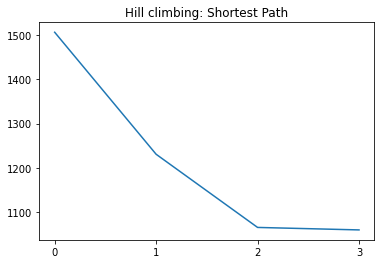

In [4]:
from smart_mobility_utilities.common import randomized_search, children_route
import matplotlib.pyplot as plt
from itertools import islice

# Visualize the costs over time
costs = []
# Set the number of children to generate
num_children = 20


current = randomized_search(G, origin.osmid, destination.osmid)
costs.append(cost(G,current))
print("Initial cost:",costs[0])

neighbours = [*islice(children_route(G, current), num_children)]
shortest = min(neighbours , key = lambda route : cost(G, route))

print("Initial min(children):",cost(G,shortest))
while cost(G, shortest) < cost(G, current):
    current = shortest
    neighbours = [*islice(children_route(G, current), num_children)]
    shortest = min(neighbours , key = lambda route : cost(G, route))
    costs.append(cost(G,current))
    print(f"Current cost:",costs[-1],"|","min(children):",cost(G, shortest))


route = current
plt.xticks(range(len(costs)))
plt.title("Hill climbing: Shortest Path")
p = plt.plot(costs)
print("Final cost:",costs[-1])



In [12]:
draw_route(G,route)

Map(center=[43.6611082, -79.3947681], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

While the implementation above is deterministic in nature, the initial route is still randomized. That means that it's possible to get different results across runs.

Hill climbing will generally return some decent results as there are few local optimal points in the route function. However, with larger search spaces that will naturally have more local maxima and plateaus, it will get stuck fairly quickly.

---

### Beam Search

While Hill Climbing maintains a single "best" state throughout the run, beam search keeps $k$ states in memory. At each iterations, it generates the neighbours for each of the $k$ states, and puts them into a pool with the $k$ states from the original beam. It then selects the best $k$ routes from the pool to become the new beam, and this process repeats. The algorithm terminates when the new beam is equal to the old beam. As it is a local search algorithm, it is also susceptible to being stuck at local maxima.

A beam search with $k=\infty$ is the same as a BFS. Because there is the risk that a state that would lead to the optimal solution might get discarded, beam searches are considered to be incomplete (it may not terminate with the solution).

<style>
i {font-weight:normal}
span {font-weight:normal}
</style>

<div style="background-color: rgba(0,0,0,0.0470588);padding:10px;font-family:monospace;">
    <b>BEAM-SEARCH</b>(<i>source</i>,<i>destination</i>,<i>k</i>) <b>return</b> a <i>route</i>
    <div style='padding-left:20px;'>
        <i><font color="green">seen</font></i> &larr; <i>nil</i><br>
        <i><font color="orange">beam</font></i> &larr; random <i>k</i> routes from <i>source</i> to <i>destination</i><br>
        add <i><font color="orange">beam</font></i> to <i><font color="green">seen</font></i><br>
        <i><font color="purple">pool</font></i> &larr; children of routes in the <i><font color="orange">beam</font></i> with consideration of <i><font color="green">seen</font></i> + <i><font color="orange">beam</font></i><br>
        <i><font color="grey">last_beam</font></i> &larr; <i>nil</i><br><br>
        while <i><font color="orange">beam</font></i> is not <i><font color="grey">last_beam</font></i> do
        <div style='padding-left:20px;'>
            <i><font color="grey">last_beam</font></i> &larr; <i><font color="orange">beam</font></i><br>
            <i><font color="orange">beam</font></i> &larr; the best <i>k</i> routes from <i><font color="purple">pool</font></i><br>
            add <i><font color="orange">beam</font></i> to <i><font color="green">seen</font></i><br>
            <i><font color="purple">pool</font></i> &larr; children of routes in the <i><font color="orange">beam</font></i> with consideration of <i><font color="green">seen</font></i> + <i><font color="orange">beam</font></i>
        </div>
        <b>return</b> optimal <i>route</i> in <i><font color="orange">beam</font></i>
    </div>
</div>
<br><br>

Here is the code in `python`:

In [5]:
import heapq

num_neighbours = 10
k = 10
seen = set()

beam = [randomized_search(G,origin.osmid,destination.osmid) for _ in range(k)]

# the seen routes must be converted to a tuple to be hashable to be stored in a set
for route in beam: seen.add(tuple(route))
pool = []

for route in beam:
    children = [*islice(children_route(G, route), num_neighbours)]
    for child in children:
        if tuple(child) in seen: continue
        else: 
            pool.append(child)
            seen.add(tuple(child))
pool += beam
last_beam = None
print(f"Cost of initial beam: {[cost(G, route) for route in beam]}" )
while beam != last_beam:
    last_beam = beam
    beam = heapq.nsmallest(k, pool, key = lambda route: cost(G, route))
    
    for route in beam: seen.add(tuple(route)) 
    
    pool = []
    for route in beam:
        children = [*islice(children_route(G, route), num_neighbours)]
        for child in children:
            if tuple(child) in seen: continue
            else: pool.append(child); seen.add(tuple(child))
    pool += beam
            
    print(f"The cost of the beam: {[cost(G, route) for route in beam]}")

route = min(beam, key = lambda route : cost(G, route)) 
print("-" * 100)
print(f"Route: {route} \n\nCost: {cost(G, route)}")




Cost of initial beam: [1434.778, 1502.042, 1695.657, 1707.43, 1316.707, 1429.374, 1237.982, 1487.721, 1508.809, 1194.686]
The cost of the beam: [1194.686, 1219.5, 1231.624, 1237.982, 1241.577, 1247.797, 1248.044, 1253.042, 1255.09, 1263.651]
The cost of the beam: [1194.686, 1210.623, 1211.106, 1212.987, 1219.5, 1231.624, 1236.889, 1237.982, 1241.577, 1246.667]
The cost of the beam: [1194.686, 1210.623, 1211.106, 1212.987, 1219.5, 1223.169, 1231.624, 1236.889, 1237.982, 1238.604]
The cost of the beam: [1194.686, 1206.115, 1210.623, 1211.106, 1212.987, 1213.79, 1219.5, 1223.169, 1227.099, 1228.059]
The cost of the beam: [1194.686, 1206.115, 1210.623, 1211.106, 1212.987, 1213.79, 1219.5, 1223.169, 1227.099, 1228.029]
The cost of the beam: [1194.686, 1206.115, 1210.623, 1210.975, 1211.106, 1212.987, 1213.79, 1219.5, 1223.169, 1227.099]
The cost of the beam: [1194.686, 1206.115, 1210.623, 1210.975, 1211.106, 1212.987, 1213.79, 1219.5, 1223.169, 1227.099]
------------------------------------

In [17]:
draw_route(G,route)

Map(center=[43.6611082, -79.3947681], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

---
### A* Search
A* (pronounced A-star) search is an informed search algorithm widely used in pathfinding and graph traversal.

A* works by "greedily" choosing which vertex to explore next, based on a function:

$f(V) = h(V) + g(V)$, where $h$ is a heuristic, and $g$ is the cost accrued up to that point.



<style>
i {font-weight:normal}
span {font-weight:normal}
</style>

<div style="background-color: rgba(0,0,0,0.0470588);padding:10px;font-family:monospace;">
    <b>A* Heuristic</b> &larr; sum of straight-line distance between the node to source and node to destination<br>
    <b>PQ</b> &larr; min heap according to <b>A* Heuristic</b><br><br>
    <b>A*-SEARCH</b>(<i>source</i>,<i>destination</i>) <b>return</b> a <i>route</i>
    <div style='padding-left:20px;'>
        <i><font color="green">frontier</font></i> &larr; a <b>PQ</b> initialized with <i>source</i><br>
        <i><font color="grey">explored</font></i> &larr; <i>empty</i><br>
        <i><font color="orange">found</font></i> &larr; <i>False</i><br>
        while <i><font color="green">frontier</font></i> is not <i>empty</i> and <i><font color="orange">found</font></i> is <i>False</i> do
        <div style='padding-left:20px;'>
        <i>node</i> &larr; <i><font color="green">frontier</font></i>.pop()<br>
        add <i>node</i> to <i><font color="grey">explored</font></i><br>
        for <i>child</i> in <i>node</i>.expand() do
            <div style='padding-left:20px;'>
                if <i>child</i> is not in <i><font color="grey">explored</font></i> and <i>child</i> is not in <i><font color="green">frontier</font></i> then
                <div style='padding-left:20px;'>
                if <i>child</i> is <i>destination</i> then
                    <div style='padding-left:20px;'>
                        <i>route</i> &larr; <i>child</i>.route()<br>
                        <i><font color="orange">found</font></i> &larr; <i>True</i>
                    </div>
                add <i>child</i> to <i><font color="green">frontier</font></i>
                </div>
            </div>
        </div>
    return <i>route</i>
    </div>
</div>
<br><br>

#### The Heuristic

The driving force behind A* is the selection of a new vertex (or node) to explore based on the lowest heuristic value. This heuristic value is computed by the following formula:

let $dist(x,y)$ be a function that calculates the straight line distance between two nodes $x,y$,<br>
and let $O$ be the origin node, and $D$ be the destination node,

$h(V) = dist(V,O) + dist(V,D)$ for any given node $V$

As the sum of the distance to the origin and destination is minimized when $V$ lies on a straight line from $O$ to $D$, this heuristic prioritizes nodes which are "closer" to the straight-line distance from origin to destination.

:::{note}
The implentation of the A* heuristic in `smart_mobility_utilities` defaults to calculating distances as if the Earth were flat. For local searches, this yields the best results. If the size of the search area is larger, it is better to calculate distance using the `haversine_distance`, which takes into account the curvature of the Earth.

This can be done by setting the distance function like so:<br>
```astar_heuristic(G,origin.osmid,destination.osmid, measuring_dist = haversine_distance)```
:::

In [37]:
# Get the A* Heuristic for all the nodes in the graph
from smart_mobility_utilities.problem import astar_heuristic
toOrigin, toDestination = astar_heuristic(G, origin.osmid, destination.osmid)

route = []
frontier = list()

frontier.append(origin)
explored = set()
found = False

while frontier and not found:    
    # choose a node based on its heuristic value
    node = min(frontier, key = lambda node : toOrigin[node.osmid] + toDestination[node.osmid])
    frontier.remove(node)
    explored.add(node)
    
    # expand its children
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                route = child.path()
                found = True
                continue
            frontier.append(child)

bar.close()
print("The route is ",route)
print("Route cost is", cost(G, route))

The route is  [1907446268, 55808224, 55808227, 8699043521, 1907446267, 8699033082, 55808301, 6542457312, 4953810914, 55808233, 299625330, 389677953, 7967019556, 7967019555, 390547782, 389678107, 389678111, 389678112, 389678113, 389678146, 2143434862, 2143434860, 7311083158, 1258707987, 389678121, 50885147, 389678122, 1258707990, 7153999189, 389678124, 6028562355, 2557542523, 389677907, 389678038, 389678039, 389678040, 2143436381, 7311057930, 7311057931, 389678216, 389678215, 389678226, 1633421933, 1633421938]
Route cost is 1137.69


In [32]:
draw_route(G,route)

Map(center=[43.6611082, -79.3947681], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

---
### Bi-Directional Search
The purpose of bi-directional searches are to run two simultaneous, non-parallel searches; one starts at the origin and the other at the destination, with the goal of meeting somewhere in between.

This approach is more efficient because of the time complexities involved.

For example, a BFS search with a constant branching factor $b$ and depth $d$ would have an overall time complexity of $O(d^b)$. By running two BFS searches in opposite directions with only half the depth ($d/2$), the time complexity becomes instead $O((d/2)^b)+O((d/2)^b)$, which is much lower than the original $O(d^b)$.

<style>
i {font-weight:normal}
span {font-weight:normal}
</style>

<div style="background-color: rgba(0,0,0,0.0470588);padding:10px;font-family:monospace;">
    <b>BI-DIRECTIONAL-SEARCH</b>(<i>source</i>,<i>destination</i>) <b>return</b> a <i>route</i>
    <div style='padding-left:20px;'>
        <font color="#03A9F4">// _f for forward, _b for backward</font><br>
        <i><font color="green">frontier_f</font></i> &larr; initialized with <i>source</i><br>
        <i><font color="green">frontier_b</font></i> &larr; initialized with <i>destination</i><br>
        <i><font color="grey">explored_f</font></i> &larr; <i>empty</i><br>
        <i><font color="grey">explored_b</font></i> &larr; <i>empty</i><br>
        <i><font color="orange">found</font></i> &larr; <i>False</i><br>
        <i><font color="purple">collide</font></i> &larr; <i>False</i> <font color="#03A9F4">// if front overlaps with back</font><br>
        <i><font color="blue">found</font></i> &larr; <i>False</i><br>
        <i><font color="blue">altr_expand</font></i> &larr; <i>False</i><font color="#03A9F4">// expansion direction</font><br><br>
        while <i><font color="green">frontier_f</font></i> is not <i>empty</i> and <i><font color="green">frontier_b</font></i> is not <i>empty</i> and not <i><font color="purple">collide</font></i> and not <i><font color="orange">found</font></i> do
        <div style='padding-left:20px;'>
            if <i><font color="blue">altr_expand</font></i> then
            <div style='padding-left:20px;'>
                <i>node</i> &larr; <i><font color="green">frontier_f</font></i>.pop()<br>
                add <i>node</i> to <i><font color="grey">explored_f</font></i><br>
                for <i>child</i> in <i>node</i>.expand() do
                <div style='padding-left:20px;'>
                    if <i>child</i> in <i><font color="grey">explored_f</font></i> then continue<br>
                    if <i>child</i> is <i>destination</i> then
                        <div style='padding-left:20px;'>
                            <i>route</i> &larr; <i>child</i>.route()<br>
                            <i><font color="orange">found</font></i> &larr; <i>True</i>
                        </div>
                    if <i>child</i> in <i><font color="grey">explored_b</font></i> then
                        <div style='padding-left:20px;'>
                            <i>route</i> &larr; <i>child</i>.route() + reverse(<i>overlapped</i>.route())<br>
                            <i><font color="purple">collide</font></i> &larr; <i>True</i>
                        </div>
                    add <i>child</i> to <i><font color="green">frontier_f</font></i><br>
                    <i><font color="blue">altr_expand</font></i> &larr; not <i><font color="blue">altr_expand</font></i>
                </div>
            </div>
            else
            <div style='padding-left:20px;'>
                <i>node</i> &larr; <i><font color="green">frontier_b</font></i>.pop()<br>
                add <i>node</i> to <i><font color="grey">explored_b</font></i><br>
                for <i>child</i> in <i>node</i>.expand() do
                <div style='padding-left:20px;'>
                    if <i>child</i> in <i><font color="grey">explored_b</font></i> then continue<br>
                    if <i>child</i> is <i>origin</i> then
                        <div style='padding-left:20px;'>
                            <i>route</i> &larr; <i>child</i>.route()<br>
                            <i><font color="orange">found</font></i> &larr; <i>True</i>
                    </div>
                    if <i>child</i> in <i><font color="grey">explored_f</font></i> then
                        <div style='padding-left:20px;'>
                            <i>route</i> &larr; reverse(<i>child</i>.route()) + <i>overlapped</i>.route()<br>
                            <i><font color="purple">collide</font></i> &larr; <i>True</i>
                        </div>
                    add <i>child</i> to <i><font color="green">frontier_b</font></i><br>
                    <i><font color="blue">altr_expand</font></i> &larr; not <i><font color="blue">altr_expand</font></i>
                </div>
            </div>
        </div>
        return <i>route</i>
    </div>
</div>
<br><br>

Let's implement A* as a bi-directional algorithm. Our criteria for expansion, both forwards and backwards, will be the A* heuristic.

In [38]:
# define destination and origin for the backwards expansion
destination_b = origin
origin_b = destination

# get A*
toOrigin_f, toDestination_f = astar_heuristic(G, origin.osmid, destination.osmid)
toOrigin_b, toDestination_b = astar_heuristic(G, origin_b.osmid, destination_b.osmid)

route = []

f_value = lambda node: toOrigin_f[node.osmid] + toDestination_f[node.osmid]
b_value = lambda node: toOrigin_b[node.osmid] + toDestination_b[node.osmid]

frontier_f = list()
frontier_b = list()

frontier_f.append(origin)
frontier_b.append(origin_b)

explored_f = list()
explored_b = list()

collide = False
found = False
altr_expand = False # to alternate between front and back

while frontier_f and frontier_b and not collide and not found:
   
    if altr_expand:
        # remove node_f from frontier_f to expand it
        node = min(frontier_f, key = lambda node : f_value(node))
        frontier_f.remove(node)
        explored_f.append(node)
        
        for child in node.expand():
            if child in explored_f: continue
            
            if child == destination:
                route = child.path()
                found = True
                break

            # checking for collusion with the target expansion
            if child in explored_b:
                overlapped = next((node for node in explored_b if node == child))
                # we don't take the overlapped node twice
                route = child.path()[:-1] + overlapped.path()[::-1]
                collide = True
                break

            frontier_f.append(child)
        altr_expand = False
    else:
        # remove node_b from frontier_b to expand it
        node = min(frontier_b, key = lambda node : b_value(node))
        frontier_b.remove(node)
        explored_b.append(node)
        
        for child in node.expand():
            if child in explored_b: continue
            if child == destination_b:
                route = child.path()[::-1] # we reverse the list because we expand from the back
                found = True
                break

            if child in explored_f:
                overlapped = next((node for node in explored_f if node == child), None)
                route = overlapped.path()[:-1] + child.path()[::-1]
                collide = True
                break

            frontier_b.append(child)
        altr_expand = True

print("The route is \n\n",route)
print("Cost of the route:",cost(G,route))

The route is 

 [1907446268, 55808224, 55808227, 8699043521, 1907446267, 8699033082, 55808301, 6542457312, 4953810914, 55808233, 299625330, 389677953, 7967019556, 7967019555, 390547782, 389678107, 389678111, 389678112, 389678113, 389678146, 2143434862, 2143434860, 7311083158, 1258707987, 389678121, 50885147, 389678122, 1258707990, 7153999189, 389678124, 6028562355, 2557542523, 389677907, 389678038, 389678039, 389678040, 2143436381, 7311057930, 7311057931, 389678216, 389678215, 389678226, 1633421933, 1633421938]
Cost of the route: 1137.69


In [35]:
draw_route(G,route)

Map(center=[43.6611082, -79.3947681], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

---
## Summary



Let's compare and contrast the search algorithms described above.

#### Traversal Algorithms

BFS generally yields routes that are shorter, as it moves layer-by-layer from the origin to the destination, whereas DFS tends to return longer routes, as it searches the entire depth of the graph first, before backtracking.


Let's compare the run times and lengths of the two algorithms on our University of Toronto example. We'll use the `search` module of `smart_mobility_utilities` to avoid having to rewrite the search code.

In [6]:
from smart_mobility_utilities import search
from time import process_time

start_bfs = process_time()
route_bfs = search.BFS(origin,destination)
end_bfs = process_time()

start_dfs = process_time()
route_dfs = search.DFS(origin,destination)
end_dfs = process_time()

print("BFS run time:",end_bfs-start_bfs,"s")
print("BFS Cost:", cost(G,route_bfs),"m")
print("")
print("DFS run time:",end_dfs-start_dfs,"s")
print("DFS Cost:", cost(G,route_dfs),"m")

BFS run time: 0.012602360999991902 ns
BFS Cost: 1385.116 m

DFS run time: 0.024674805999993055 ns
DFS Cost: 6092.076 m


### Shortest Path Algorithms

Let's also benchmark the shortest path algorithms. For the sake of comparison, we'll use `route_bfs` as the "random" route for the algorithms that require a default route to optimize.

In [7]:
start_dijkstra = process_time()
route_dijkstra = search.dijkstra(G,origin,destination)
end_dijkstra = process_time()

print("Dijkstra run time:",end_dijkstra-start_dijkstra,"s")
print("Dijkstra Cost:", cost(G,route_dijkstra),"m")

start_hill_climb = process_time()
route_hill_climb = search.hill_climbing(G,origin,destination, num_children=20, starter=route_bfs)
end_hill_climb = process_time()

print("Hill Climbing run time:",end_hill_climb-start_hill_climb,"s")
print("Hill Climbing Cost:", cost(G,route_hill_climb),"m")

start_beam = process_time()
route_beam = search.beam(G,origin,destination, num_neighbours=10,k=10,starter=route_bfs)
end_beam = process_time()

print("Beam run time:",end_beam-start_beam,"s")
print("Beam Cost:", cost(G,route_beam),"m")

Dijkstra run time: 0.1362149580000107 ns
Dijkstra Cost: 1029.481 m
Hill Climbing run time: 11.134142686000004 ns
Hill Climbing Cost: 1030.83 m
Beam run time: 64.150777061 ns


TypeError: cost() takes 2 positional arguments but 3 were given